<a href="https://colab.research.google.com/github/eshwar7565/Algorithms/blob/master/Market%20Basket%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy                                                  as np
import pandas                                                 as pd
import matplotlib                                             as mp
from   matplotlib                    import pyplot            as plt
from   mlxtend.frequent_patterns     import apriori           as ap
from   mlxtend.frequent_patterns     import association_rules as ar
import math


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [5]:
items_data_df   = pd.read_csv("Grocery Products Purchase.csv")
items_data_df.head(10)


,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
items_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Product 1   9835 non-null   object
 1   Product 2   7676 non-null   object
 2   Product 3   6033 non-null   object
 3   Product 4   4734 non-null   object
 4   Product 5   3729 non-null   object
 5   Product 6   2874 non-null   object
 6   Product 7   2229 non-null   object
 7   Product 8   1684 non-null   object
 8   Product 9   1246 non-null   object
 9   Product 10  896 non-null    object
 10  Product 11  650 non-null    object
 11  Product 12  468 non-null    object
 12  Product 13  351 non-null    object
 13  Product 14  273 non-null    object
 14  Product 15  196 non-null    object
 15  Product 16  141 non-null    object
 16  Product 17  95 non-null     object
 17  Product 18  66 non-null     object
 18  Product 19  52 non-null     object
 19  Product 20  38 non-null     object
 20  Product 

In [7]:
#removing the extraneous attributes 

records = []
for i in range(1, 9000):
    records.append([str(items_data_df.values[i, j]) for j in range(0, 31)])
import math

# Example list with sublists containing NaN values


# Remove NaN values from sublists using list comprehension
records = [[x for x in sublist if x!="nan"] for sublist in records]

combined_list = [item for sublist in records for item in sublist]

# print the combined lit




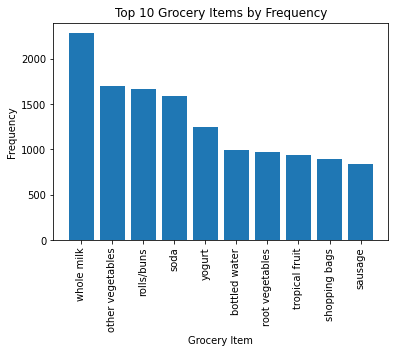

<Figure size 2160x1080 with 0 Axes>

In [8]:


from collections import Counter

# example list of grocery items with sublists that do not have quantity or price information
#grocery_list = ["apple", "banana", "apple", "orange", "banana", "grape", "apple", "grape", "kiwi", "apple", "banana", "orange", "pear", "apple", "banana", "pear", "kiwi", "orange", "apple", "grape"]

# count the occurrences of each grocery item
item_counts = Counter(combined_list)

# sort the dictionary by the count and select the top 10 items
top_items = dict(sorted(item_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# plot the top 10 items as a bar chart
plt.bar(top_items.keys(), top_items.values())
plt.xticks(rotation=90)

plt.xlabel("Grocery Item")
plt.ylabel("Frequency")
plt.title("Top 10 Grocery Items by Frequency")
plt.figure(figsize=(30,15))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()



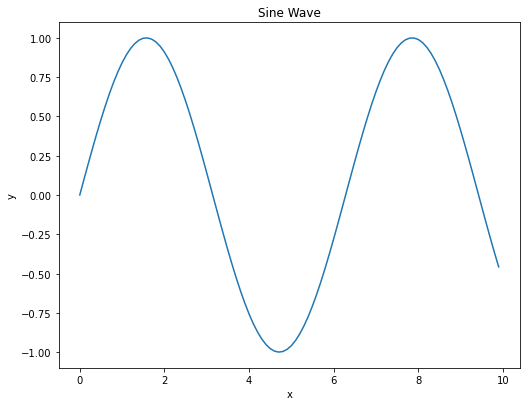

In [9]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)

# create a new figure with a larger size
fig = plt.figure(figsize=(8, 6))

# create a new subplot
ax = fig.add_subplot(111)

# plot the data on the subplot
ax.plot(x, y)

# adjust the margins of the subplot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# add labels and a title to the plot
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Sine Wave")

# display the plot
plt.show()


In [10]:
unique_items = []
for col in items_data_df.columns:
    # extract the unique values in the column and add them to the list
    unique_items.extend(items_data_df[col].unique().tolist())
unique_values = list(set(unique_items))

print(unique_items)


['citrus fruit', 'tropical fruit', 'whole milk', 'pip fruit', 'other vegetables', 'rolls/buns', 'potted plants', 'beef', 'frankfurter', 'chicken', 'butter', 'fruit/vegetable juice', 'packaged fruit/vegetables', 'chocolate', 'specialty bar', 'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread', 'hamburger meat', 'root vegetables', 'pork', 'pastry', 'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham', 'turkey', 'curd cheese', 'red/blush wine', 'frozen potato products', 'flour', 'sugar', 'frozen meals', 'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish', 'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn', 'finished products', 'beverages', 'bottled beer', 'dessert', 'dog food', 'specialty chocolate', 'condensed milk', 'cleaner', 'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese', 'liquor', 'pickled vegetables', 'liquor (appetizer)', 'UHT-milk', 'candy', 'onions', 'hair spray', 'photo/film', 'domestic eggs', 'margarine', 'shopping

In [11]:
encoded_vals        = []
for i, rows in items_data_df.iterrows():
	labels          = {}
	uncommons       = list(set(unique_items) - set(rows))
	commons         = list(set(unique_items).intersection(rows))
	for uc in uncommons:
		labels[uc]  = 0
	for com in commons:
		labels[com] = 1
	encoded_vals.append(labels)
encoded_vals[0]

encode_df           = pd.DataFrame(encoded_vals)



In [12]:
freq_items          = ap(encode_df, min_support=0.05, use_colnames=True)
print(freq_items.head())
print("\n\n\n\n\n\n")

print(freq_items)


    support                 itemsets
0  0.053279                   (curd)
1  0.080529           (bottled beer)
2  0.052364                (napkins)
3  0.193493       (other vegetables)
4  0.072293  (fruit/vegetable juice)







     support                             itemsets
0   0.053279                               (curd)
1   0.080529                       (bottled beer)
2   0.052364                            (napkins)
3   0.193493                   (other vegetables)
4   0.072293              (fruit/vegetable juice)
..       ...                                  ...
58  0.058465                     (nan, margarine)
59  0.082664                  (nan, citrus fruit)
60  0.074733  (other vegetables, nan, whole milk)
61  0.055923            (nan, yogurt, whole milk)
62  0.056533        (nan, whole milk, rolls/buns)

[63 rows x 2 columns]


In [13]:
assocn_rules_conf   = ar(freq_items, metric="confidence", min_threshold=0.7)
print(assocn_rules_conf)

                       antecedents consequents  antecedent support  \
0                           (curd)       (nan)            0.053279   
1                   (bottled beer)       (nan)            0.080529   
2                        (napkins)       (nan)            0.052364   
3               (other vegetables)       (nan)            0.193493   
4          (fruit/vegetable juice)       (nan)            0.072293   
5                         (coffee)       (nan)            0.058058   
6                         (pastry)       (nan)            0.088968   
7                        (sausage)       (nan)            0.093950   
8                      (pip fruit)       (nan)            0.075648   
9                         (yogurt)       (nan)            0.139502   
10                   (brown bread)       (nan)            0.064870   
11                    (rolls/buns)       (nan)            0.183935   
12                   (canned beer)       (nan)            0.077682   
13                  

In [14]:
assocn_rules_supp   = ar(freq_items, metric="support", min_threshold=0.05)
print(assocn_rules_supp)

                 antecedents               consequents  antecedent support  \
0                      (nan)                    (curd)            0.999898   
1                     (curd)                     (nan)            0.053279   
2                      (nan)            (bottled beer)            0.999898   
3             (bottled beer)                     (nan)            0.080529   
4                      (nan)                 (napkins)            0.999898   
..                       ...                       ...                 ...   
75         (nan, rolls/buns)              (whole milk)            0.183833   
76  (whole milk, rolls/buns)                     (nan)            0.056634   
77                     (nan)  (whole milk, rolls/buns)            0.999898   
78              (whole milk)         (nan, rolls/buns)            0.255516   
79              (rolls/buns)         (nan, whole milk)            0.183935   

    consequent support   support  confidence      lift  leverag

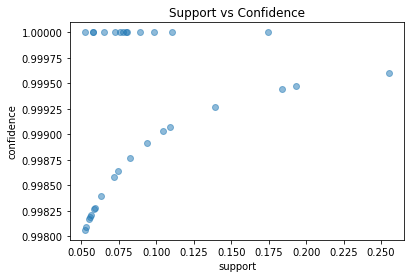

In [15]:
plt.scatter(assocn_rules_conf['support'], assocn_rules_conf['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

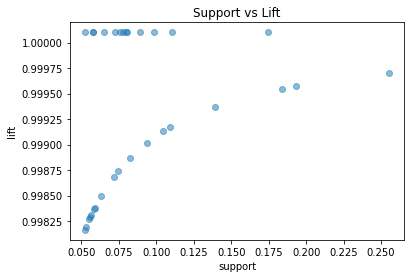

In [16]:
plt.scatter(assocn_rules_conf['support'], assocn_rules_conf['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
